## Reading xcube datasets from object storage bucket 

This notebook shows, how xcube can be used for reading an xcube dataset stored in an object storage. This is done by using a URL pointing to the cube's Zarr directory within a bucket. The URL format to be used should follow the pattern `{endpoint_url}/{bucket}/{cube}`.

An overview of demo cubes is given in the notebook called [show_remote_demo_cubes.ipynb](./show_remote_demo_cubes.ipynb).



Importing the necessary xcube API function:

In [1]:
from xcube.core.dsio import open_cube

Importing an xcube dataset containing Sea Surface Temperature data for the Southern North Sea from the xcube-examples bucket:

In [2]:
cube = open_cube('https://s3.eu-central-1.amazonaws.com/xcube-examples/bc-sst-sns-l2c-2017_1x704x640.zarr', s3_kwargs=dict(anon=True))

View the metadata of the cube:

In [3]:
cube

<xarray.Dataset>
Dimensions:       (bnds: 2, lat: 5632, lon: 10240, time: 365)
Coordinates:
  * lat           (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.0 48.0
    lat_bnds      (lat, bnds) float64 dask.array<chunksize=(5632, 2), meta=np.ndarray>
  * lon           (lon) float64 -16.0 -16.0 -15.99 -15.99 ... 10.66 10.66 10.67
    lon_bnds      (lon, bnds) float64 dask.array<chunksize=(10240, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-31T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float64 dask.array<chunksize=(1, 704, 640), meta=np.ndarray>
Attributes:
    acknowledgment:             Data Cube produced based on data provided by ...
    comment:                    
    contributor_name:           
    contributor_role:           
    creator_email:              info@brockmann-consult.de
    creator_name:               Brockmann Consult GmbH
    creator_url:                https://www.brockmann-consult.de
    date_modified:              2019-06-03T09:36:47.674193
    geospatial_lat_max:         62.666666666666664
    geospatial_lat_min:         48.0
    geospatial_lat_resolution:  0.002604166666666666
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         10.666666666666664
    geospatial_lon_min:         -16.0
    geospatial_lon_resolution:  0.0026041666666666665
    geospatial_lon_units:       degrees_east
    history:                    xcube/reproj-snap-nc
    id:                         dcs4cop-bc-sst-sns-l2c-v1
    institution:                Brockmann Consult GmbH
    keywords:                   
    license:                    terms and conditions of the DCS4COP data dist...
    naming_authority:           bc
    processing_level:           L2C
    project:                    DCS4COP
    publisher_email:            info@brockmann-consult.de
    publisher_name:             Brockmann Consult GmbH
    publisher_url:              https://www.brockmann-consult.de
    references:                 https://dcs4cop.eu/
    source:                     CMEMS Global SST & Sea Ice Anomaly Data Cube
    standard_name_vocabulary:   
    summary:                    
    title:                      DCS4COP CMEMS Global SST & Sea Ice Anomaly Da...

In [4]:
sst = cube.analysed_sst.isel(time=0)
sst

<xarray.DataArray 'analysed_sst' (lat: 5632, lon: 10240)>
dask.array<getitem, shape=(5632, 10240), dtype=float64, chunksize=(704, 640), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 62.67 62.66 62.66 62.66 ... 48.01 48.01 48.0 48.0
  * lon      (lon) float64 -16.0 -16.0 -15.99 -15.99 ... 10.66 10.66 10.66 10.67
    time     datetime64[ns] 2017-01-01T12:00:00
Attributes:
    comment:              
    long_name:           analysed sea surface temperature
    source:              UKMO-L4HRfnd-GLOB-OSTIA
    spatial_resampling:  Nearest
    standard_name:       sea_surface_foundation_temperature
    type:                foundation
    units:               kelvin
    valid_max:           4500
    valid_min:           -300

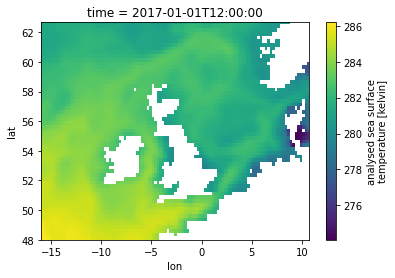

In [5]:
sst.plot.imshow()